In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FrequencyModulation(nn.Module):
    def __init__(self, frequency):
        super(FrequencyModulation, self).__init__()
        self.frequency = frequency

    def forward(self, x):
        # Apply a sine function for modulation
        return torch.sin(2 * torch.pi * self.frequency * x)

In [9]:
class EncryptionLayer(nn.Module):
    def __init__(self, key_frequency):
        super(EncryptionLayer, self).__init__()
        self.key_frequency = key_frequency

    def forward(self, x):
        # Apply frequency shift as a form of encryption
        return torch.sin(2 * torch.pi * (self.key_frequency + x))

In [10]:
class FrequencyHopping(nn.Module):
    def __init__(self, frequencies):
        super(FrequencyHopping, self).__init__()
        self.frequencies = frequencies

    def forward(self, x):
        # Apply frequency hopping
        for freq in self.frequencies:
            x = torch.sin(2 * torch.pi * freq * x)
        return x

In [11]:
class DecryptionLayer(nn.Module):
    def __init__(self, key_frequency):
        super(DecryptionLayer, self).__init__()
        self.key_frequency = key_frequency

    def forward(self, x):
        # Inverse of the encryption process
        return torch.asin(x) / (2 * torch.pi * self.key_frequency)

In [12]:
class FrequencyVPN(nn.Module):
    def __init__(self, frequency, key_frequency, hopping_frequencies):
        super(FrequencyVPN, self).__init__()
        self.modulation = FrequencyModulation(frequency)
        self.encryption = EncryptionLayer(key_frequency)
        self.hopping = FrequencyHopping(hopping_frequencies)
        self.decryption = DecryptionLayer(key_frequency)

    def forward(self, x):
        x = self.modulation(x)
        x = self.encryption(x)
        x = self.hopping(x)
        return self.decryption(x)

# Example usage
model = FrequencyVPN(frequency=5, key_frequency=10, hopping_frequencies=[15, 20, 25])
data = torch.tensor([1.0, 0.5, 0.3])  # Example data
encrypted_data = model(data)

In [13]:
!pip install matplotlib

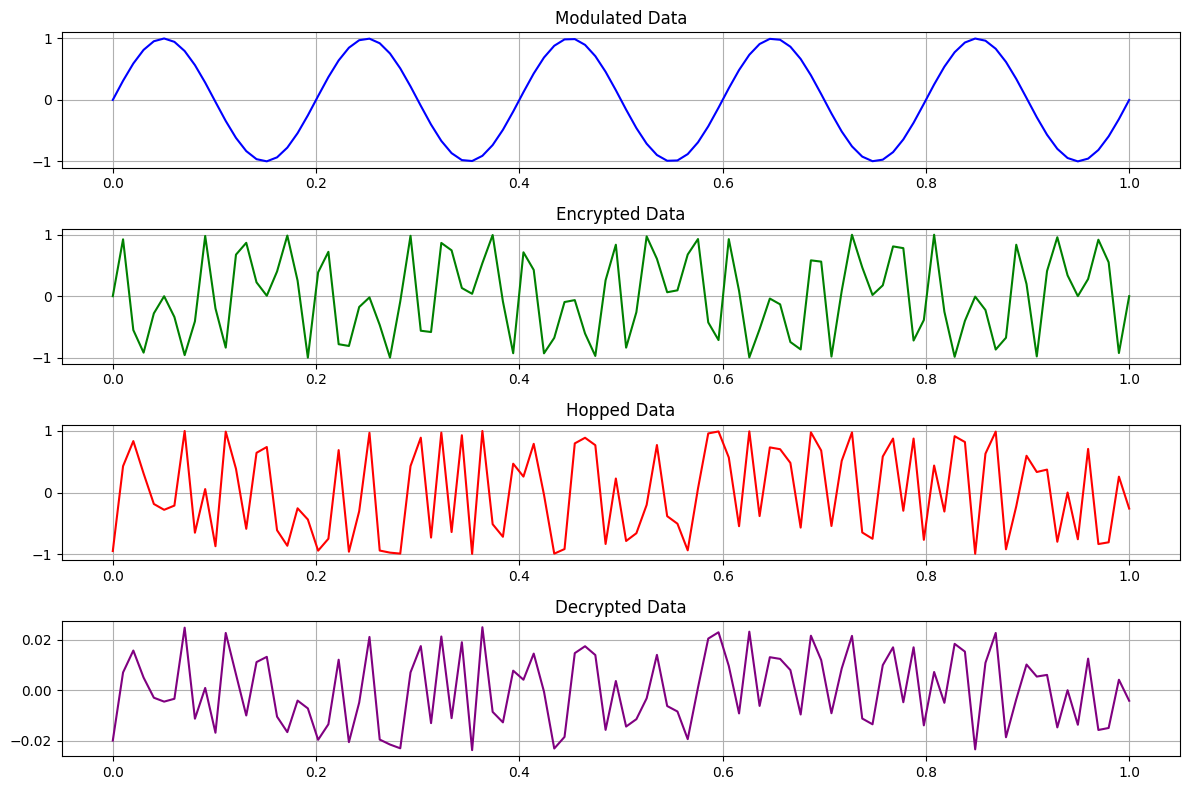

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define the Frequency Modulation Layer
class FrequencyModulation(nn.Module):
    def __init__(self, frequency):
        super(FrequencyModulation, self).__init__()
        self.frequency = frequency

    def forward(self, x):
        return torch.sin(2 * torch.pi * self.frequency * x)

# Define the Encryption Layer
class EncryptionLayer(nn.Module):
    def __init__(self, key_frequency):
        super(EncryptionLayer, self).__init__()
        self.key_frequency = key_frequency

    def forward(self, x):
        return torch.sin(2 * torch.pi * (self.key_frequency + x))

# Define the Frequency Hopping Layer
class FrequencyHopping(nn.Module):
    def __init__(self, frequencies):
        super(FrequencyHopping, self).__init__()
        self.frequencies = frequencies

    def forward(self, x):
        for freq in self.frequencies:
            x = torch.sin(2 * torch.pi * freq * x)
        return x

# Define the Decryption Layer
class DecryptionLayer(nn.Module):
    def __init__(self, key_frequency):
        super(DecryptionLayer, self).__init__()
        self.key_frequency = key_frequency

    def forward(self, x):
        return torch.asin(x) / (2 * torch.pi * self.key_frequency)

# Define the FrequencyVPN Model
class FrequencyVPN(nn.Module):
    def __init__(self, frequency, key_frequency, hopping_frequencies):
        super(FrequencyVPN, self).__init__()
        self.modulation = FrequencyModulation(frequency)
        self.encryption = EncryptionLayer(key_frequency)
        self.hopping = FrequencyHopping(hopping_frequencies)
        self.decryption = DecryptionLayer(key_frequency)

    def forward(self, x):
        x_modulated = self.modulation(x)
        x_encrypted = self.encryption(x_modulated)
        x_hopped = self.hopping(x_encrypted)
        x_decrypted = self.decryption(x_hopped)
        return x_modulated, x_encrypted, x_hopped, x_decrypted

# Set the parameters for the model
frequency = 5           # Modulation frequency
key_frequency = 10      # Encryption key frequency
hopping_frequencies = [15, 20, 25]  # Frequencies for hopping

# Create the FrequencyVPN model
model = FrequencyVPN(frequency, key_frequency, hopping_frequencies)

# Example data (simulating a data packet)
data = torch.linspace(0, 1, 100)  # 100 data points between 0 and 1

# Pass the data through the model
x_modulated, x_encrypted, x_hopped, x_decrypted = model(data)

# Convert the torch tensors to numpy arrays for plotting
data_np = data.numpy()
x_modulated_np = x_modulated.detach().numpy()
x_encrypted_np = x_encrypted.detach().numpy()
x_hopped_np = x_hopped.detach().numpy()
x_decrypted_np = x_decrypted.detach().numpy()

# Plot the data at each stage
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data_np, x_modulated_np, label='Modulated Data', color='blue')
plt.title('Modulated Data')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(data_np, x_encrypted_np, label='Encrypted Data', color='green')
plt.title('Encrypted Data')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(data_np, x_hopped_np, label='Frequency Hopped Data', color='red')
plt.title('Hopped Data')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(data_np, x_decrypted_np, label='Decrypted Data', color='purple')
plt.title('Decrypted Data')
plt.grid(True)

plt.tight_layout()
plt.show()